# You Matter, Words Matter: A Suicide Prevention Tool
**`DATA103 S11 Group 4`**
- GOZON, Jean Pauline D.
- JAMIAS, Gillian Nicole A.
- MARCELO Andrea Jean C. 
- REYES, Anton Gabriel G.
- VICENTE, Francheska Josefa

# **Requirements and Imports**
Before starting, the relevant libraries and files in building and training the model should be loaded into the notebook first.

## **Basic** Libraries
* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [11]:
import numpy as np
import pandas as pd

## **`Natural Language Processing`** Libraries
* `train_test_split` is a function that allows the dataset to be split into two randomly.
* `TFidfVectorizer` converts the given text documents into a matrix, which has TF-IDF features
* `CountVectorizer` converts the given text documents into a matrix, which has the counts of the tokens

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## **`Machine Learning`** Libraries
The following classes are classifiers that implement different methods of classification.
* `LogisticRegression` is a class under the linear models module that implements regularized logistic regression
* `MultinomialNB` is a class under the Naive Bayes module that allows the classification of discrete features
* `RandomForestClassifier` is a class under the ensemble module that trains by fitting using a number of decision trees

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

On the other hand, these classes computes and visualizes the different scores about how well a model works.
* `f1_score` computes the balanced F-score by comparing the actual classes and the predicted classes
* `hamming_loss` computes the fraction of labels that were incorrectly labeled by the model
* `accuracy_score` computes the accuracy by determining how many classes were correctly predicted
* `precision_recall_fscore_support`computes the precision, recall, F-measure and support per class
* `ConfusionMatrixDisplay` allows the visualization of the computed confusion matrix
* `confusion_matrix`  is a function that displays the number of samples that are correctly and incorrectly labeled by the model, by grouping them into four groups (i.e., True Positives, False Positives, True Negatives, False Negatives)

In [14]:
from sklearn.metrics import f1_score, roc_auc_score, hamming_loss, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Meanwhile, `GridSearchCV` is a cross-validation class that allows the exhaustive search over all possible combinations of hyperparameter values.

In [15]:
from sklearn.model_selection import GridSearchCV

Next, `ELI5` is a python library that holds support for machine learning algorithms frameworks and visualize different machine learning models.

In [ ]:
import eli5

Last, `pickle` is a module that can serialize and deserialize objects. In this notebook, it is used to save and load models.

In [16]:
import pickle

### Datasets and Files
To train the models that utilizes the traditional machine learning algorithms, the dataset that was cleaned with the removal of unnecessary sequences and lemmatized will be loaded using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [17]:
df = pd.read_csv ('lemmatized_with_char_seq_removal.csv')
df

,class,text,lemmatized_text
0,0,"'Its not a viable option, and youll be leaving...","'Its not a viable option, and youll be leave y..."
1,1,'It can be hard to appreciate the notion that ...,'It can be hard to appreciate the notion that ...
2,1,"'Hi, so last night i was sitting on the ledge ...","'Hi, so last night i be sit on the ledge of my..."
3,1,'I tried to kill my self once and failed badly...,'I try to kill my self once and fail badly cau...
4,1,'Hi NEM3030. What sorts of things do you enjoy...,'Hi NEM3030. What sort of things do you enjoy ...
...,...,...,...
241733,0,If you don't like rock then your not going to ...,If you don't like rock then your not go to get...
241734,0,You how you can tell i have so many friends an...,You how you can tell i have so many friends an...
241735,0,pee probably tastes like salty tea😏💦‼️ can som...,pee probably taste like salty tea😏💦‼️ can some...
241736,1,The usual stuff you find hereI'm not posting t...,The usual stuff you find hereI'm not post this...


Since we want to use the lemmatized text as our input, we will be removing the text that was not lemmatized. As we want the convention `text` and `class` as column names, we will be moving the lemmatized text into the text column.

In [18]:
df [['class', 'text']] = df [['class', 'lemmatized_text']]
df 

,class,text,lemmatized_text
0,0,"'Its not a viable option, and youll be leave y...","'Its not a viable option, and youll be leave y..."
1,1,'It can be hard to appreciate the notion that ...,'It can be hard to appreciate the notion that ...
2,1,"'Hi, so last night i be sit on the ledge of my...","'Hi, so last night i be sit on the ledge of my..."
3,1,'I try to kill my self once and fail badly cau...,'I try to kill my self once and fail badly cau...
4,1,'Hi NEM3030. What sort of things do you enjoy ...,'Hi NEM3030. What sort of things do you enjoy ...
...,...,...,...
241733,0,If you don't like rock then your not go to get...,If you don't like rock then your not go to get...
241734,0,You how you can tell i have so many friends an...,You how you can tell i have so many friends an...
241735,0,pee probably taste like salty tea😏💦‼️ can some...,pee probably taste like salty tea😏💦‼️ can some...
241736,1,The usual stuff you find hereI'm not post this...,The usual stuff you find hereI'm not post this...


Since the lemmatized text is already under the text column, we can already [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) the original column for the lemmatized text. 

In [19]:
df = df.drop ('lemmatized_text', axis = 1)
df

,class,text
0,0,"'Its not a viable option, and youll be leave y..."
1,1,'It can be hard to appreciate the notion that ...
2,1,"'Hi, so last night i be sit on the ledge of my..."
3,1,'I try to kill my self once and fail badly cau...
4,1,'Hi NEM3030. What sort of things do you enjoy ...
...,...,...
241733,0,If you don't like rock then your not go to get...
241734,0,You how you can tell i have so many friends an...
241735,0,pee probably taste like salty tea😏💦‼️ can some...
241736,1,The usual stuff you find hereI'm not post this...


# **Feature Engineering**

As we cannot directly feed the text data as input to the machine learning models, we have to convert it into the format that they can understand—numbers. Before doing that, since we want to save the models and vectorizers that we will be using, we will first need to define the values and functions to do so, starting with the folder where we will be saving it. 

In [20]:
main_directory = './saved_models/trad_ml_lemmatized/vectorizers/'

Next, we will be creating a function that will be saving the vectorizer to the specified path.

In [21]:
def save_vectorizers (vectorizer, vectorizer_name):
    vectorizer_filename = main_directory + vectorizer_name + '.pkl'
    
    with open(vectorizer_filename, 'wb') as file:
        pickle.dump(vectorizer, file)

## Splitting the Dataset into **`Train`**, **`Validation`**, and **`Test`** Split
Let us first define the **X** (input) and **y** (target/output) of our model. This is done to allow the stratifying of the data when it is split into the train, val and test.

The **X** (input) can be retrieved by getting the `text` column in the original dataset.

In [22]:
X = df ['text']
X

0         'Its not a viable option, and youll be leave y...
1         'It can be hard to appreciate the notion that ...
2         'Hi, so last night i be sit on the ledge of my...
3         'I try to kill my self once and fail badly cau...
4         'Hi NEM3030. What sort of things do you enjoy ...
                                ...                        
241733    If you don't like rock then your not go to get...
241734    You how you can tell i have so many friends an...
241735    pee probably taste like salty tea😏💦‼️ can some...
241736    The usual stuff you find hereI'm not post this...
241737    I still haven't beat the first boss in Hollow ...
Name: text, Length: 241738, dtype: object

Meanwhile, the **y** value (i.e., the value that we would be "feeding" our models) is the `class` column. 

In [23]:
y = df ['class']
y

0         0
1         1
2         1
3         1
4         1
         ..
241733    0
241734    0
241735    0
241736    1
241737    0
Name: class, Length: 241738, dtype: int64

Now that we have declared the input and the target output of our models, we can use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to divide the dataset into two splits. Some things to note are: (1) the split is stratified based on the **y values**, (2) the value of the random state was set to 42 for reproducibility, and (3) the dataset is shuffled.

First, let us create the train and test set. The test set is made up of 20% of the original dataset, which infers that the second split is 80% of the original. 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42, 
                                                    shuffle = True)

Second, we will be splitting the remaining 80% of the original dataset into two: the train and val sets. The train set will be 90% of the second split, while the val set will be 10% of it. 

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size = 0.1,
                                                  stratify = y_train,
                                                  random_state = 42, 
                                                  shuffle = True)

To check if the shapes of the input and output are the same, we will be looking at the shapes of the resulting DataFrame.

In [26]:
print('Train')
print('Input  shape: ', X_train.shape)
print('Output shape: ', y_train.shape, '\n')

print('Val')
print('Input  shape: ', X_val.shape)
print('Output shape: ', y_val.shape, '\n')

print('Test')
print('Input  shape: ', X_test.shape)
print('Output shape: ', y_test.shape, '\n')

Train
Input  shape:  (174051,)
Output shape:  (174051,) 

Val
Input  shape:  (19339,)
Output shape:  (19339,) 

Test
Input  shape:  (48348,)
Output shape:  (48348,) 



## Tokenizing with **`TF-IDF` Vectorizer**

Now, we can proceed with tokenizing our input. To do this, we first create an instance of a [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with default values for its parameter.

In [22]:
tfidf_vectorizer = TfidfVectorizer()

### **`Train`** Data
With the created vectorizer, we can now use the [`fit_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform) function, which will learn the vocabulary and the inverse document frequency from the data provided, and then create a document-term matrix using the same data.

In [24]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))

To use this vectorizer that has learned from the vocabulary, let us save it using the function we previously defined. 

In [ ]:
save_vectorizers(tfidf_vectorizer, 'tfidf')

### **`Validation`** Data
Using the [`transform`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.transform) function, we will be creating a document-term matrix for the validation set. For this, it is important to convert the datatype of the values in the validation set into **Unicode**, as this is the type accepted by the function.### **`Validation`** Data

In [26]:
tfidf_val = tfidf_vectorizer.transform(X_val.values.astype('U'))

### **`Test`** Data
Next, we will also [`transform`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.transform) our test data into a document-term matrix, and to do this, we also have to convert it into the **Unicode** datatype.

In [28]:
tfidf_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

## Tokenizing with **`Count` Vectorizer**

Like what we did in for the  [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), an instance of a [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) will be created.

In [30]:
count_vectorizer = CountVectorizer()

### **`Train`** Data
As we have already created a [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), we can already learn the vocabulary from the train set (that was transformed into **Unicode**) and get the document-term matrix using the [`fit_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform) function. 

In [32]:
count_train = count_vectorizer.fit_transform(X_train.values.astype('U'))

Since it has already learned from the vocabulary, we can already save the vectorizer.

In [33]:
save_vectorizers(count_vectorizer, 'count')

### **`Validation`** Data
Next, using the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) that has learned the vocabulary, we will be [`transform`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)ing the validation set into a document-term matrix. 

In [34]:
count_val = count_vectorizer.transform(X_val.values.astype('U'))

### **`Test`** Data
Last, the test set will also be [`transform`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)ed into the form that the models can understand—which in this case, a document-term matrix.

In [36]:
count_test = count_vectorizer.transform(X_test.values.astype('U'))

# Modeling and Evaluation

Now that we have transformed our data into the format that our algorithms can understand, we can move on to the modeling proper.

## Defining the **Functions**

To start with, let us first define the functions and the values needed to easily train the model. First, we will be creating a list that will hold the [`dictionaries`](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) of scores. 

In [38]:
scores_list = []

Next, we will also declare the path where our trained models will be saved. 

In [39]:
main_directory = './saved_models/trad_ml_lemmatized/'

After this, to abstract the way we save our models, let us define a function that will: (1) create the path where our model will be saved, (2) the model's file name, and (3) save the model to the specified path.

In [40]:
def save_models (model, model_name, vectorizer_name):
    curr_directory = main_directory + model_name + '/' + vectorizer_name + '/'
    
    model_filename = curr_directory + 'model' + '.pkl'
    
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)

Next, we will be creating a function that will call the functions for the metrics (i.e., [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), [`hamming_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html), and [`precision_recall_fscore_support`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)) that are used for the scoring. 

In [41]:
def scores (y_true, y_pred):
    accuracy = accuracy_score(y_true = y_true, y_pred = y_pred) * 100
    f1_micro_average = f1_score(y_true = y_true, y_pred = y_pred, average = 'micro') * 100
    f1_macro_average = f1_score(y_true = y_true, y_pred = y_pred, average = 'macro') * 100
    hamming_loss_score = hamming_loss(y_true = y_true, y_pred = y_pred) * 100
    precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average = 'micro')
    
    return accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision * 100, recall * 100

To be able to view the scores in a readable format, we also created a function that would print the metric's name and the score, side-by-side.

In [42]:
def print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall):
    print('Accuracy: ', accuracy, '%')
    print('F1 Macro Average: ', f1_macro_average, '%')
    print('F1 Micro Average: ', f1_micro_average, '%')
    print('Hamming Loss: ', hamming_loss_score, '%')
    print('Precision: ', precision, '%')
    print('Recall: ', recall, '%')

As we would be training six models, we would also be abstracting the way that we train the model by creating a function. In this function: (1) the model will be trained, (2) the model will be used to predict on the train set, (3) the score on the train predictions will be computed and printed, (4) the model will be used to predict on the test set, and (5) the model will be saved to the created directory. In addition, this function returns the trained model and the test predictions. 

In [43]:
def train_model(base_model, X_train, y_train, X_test, y_test, model_name, vectorizer_name):
    test_predictions = np.zeros((len(y_test), 1))   
                                                       
    model = base_model
    model.fit(X_train, y_train)   
    
    train_predictions = model.predict(X_train)                      
    accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_train, train_predictions)    
    print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

    test_predictions = model.predict(X_test)       
    
    save_models(model, model_name, vectorizer_name)
    
    return model, test_predictions

Last, we would also be creating a function that would be tuning the model through the use of [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Additionally, like in the training fnuction, the tuned model will be used to predict on the train set, and the scores of the predictions will be computed and printed. 

Afterwards, the model will also be used to predict on the test set, and then, the model will be saved, before returning the tuned model and the predictions on the test set.

In [44]:
def tune_and_train_model(model, hyperparameters,
                         X_train, y_train, 
                         X_test, y_test, 
                         model_name, vectorizer_name,
                         scoring='accuracy', cv = 5):
    
    print('Tuning', str(model) + '...')
        
    model_cv = GridSearchCV(model, hyperparameters, cv = cv, scoring = scoring, n_jobs = -1)
    model_cv.fit(X_train, y_train)
        
    train_predictions = model_cv.predict(X_train)                              
    accuracy = accuracy_score(train_predictions, y_train)           
        
    test_predictions = model_cv.predict(X_test)               
    
    save_models(model_cv.best_estimator_, model_name, vectorizer_name)
    
    return model_cv.best_estimator_, test_predictions

## Declaration of **Hyperparameter Space**

Before we move on to the actual training proper, we will be defining the hyperparameter space for each of the machine learning algorithms.

Let us start with the hyperparameter space of the [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) models. For this, we will be tuning the **C** (inverse of regularization strength) and the **max_iter** (the maximum numbers of iterations allowed for solvers to converge).

In [45]:
lr_hp_space = [{
    'C' : [0.01, 0.1, 1, 10],
    'max_iter' : [50, 100, 300, 600, 900, 1100] 
}]

Next, for the [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html), we will be tuning the value for **alpha** (Additive (Laplace/Lidstone) smoothing parameter) and the **fit_prior** (if the model will learn the prior probabilities of the classes).

In [46]:
mnb_hp_space = [{
    'alpha' : [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'fit_prior' : [True, False]
}]

Last, for the [`Random Forest Classifiers`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), there will be three hyperparameters that we want to tune: (1) **n_estimators** (the number of trees), (2) **max_depth** (the maximum depth allowed for the tree), and (3) **max_leaf_nodes** (the maximum number of leaf nodes allowed). 

In [47]:
rf_hp_space = [{
    'n_estimators' : [50, 100, 150],
    'max_depth' : [None, 50, 100, 150],
    'max_leaf_nodes' : [None, 50, 100]
}]

## Logistic Regression (TF-IDF Vectorizer)
For our first model, we will be training and tuning a [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) using inputs created using [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

### Model Training 
As a starting point, let us first define an instance of [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). The **n_jobs = -1** just means that all processors can be used for its training.

In [48]:
log_reg = LogisticRegression(n_jobs = -1)

Using this instance, we will now be training the model using the function we previously created.

In [49]:
log_reg_tfidf, lr_test_predictions_tfidf = train_model (log_reg, 
                                                        tfidf_train, y_train, 
                                                        tfidf_test, y_test, 
                                                        'logreg', 'tfidf')

Accuracy:  94.13036620687677 %
F1 Macro Average:  94.12967568675204 %
F1 Micro Average:  94.13036620687677 %
Hamming Loss:  5.869633793123226 %
Precision:  94.13036620687677 %
Recall:  94.13036620687677 %


To fully understand how our model fares with the test data, we will be plotting the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test data using the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) function.

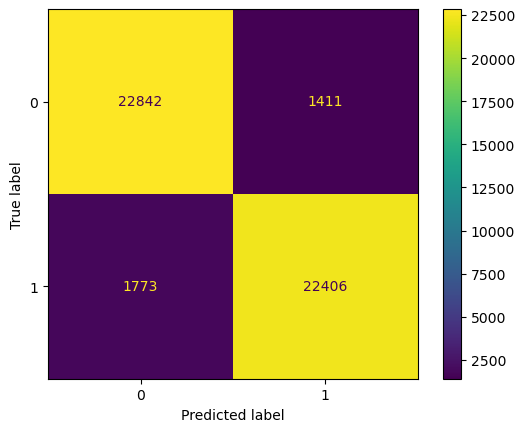

In [50]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_test_predictions_tfidf)).plot()

From this, we can see that the model incorrectly 5.81% of the negative samples, and 7.33% of the positive samples. Now, let us compute the scores of the model on the test set using the metrics. 

In [51]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, lr_test_predictions_tfidf)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  93.42583415923357 %
F1 Macro Average:  93.42530133493226 %
F1 Micro Average:  93.42583415923357 %
Hamming Loss:  6.574165840766436 %
Precision:  93.42583415923357 %
Recall:  93.42583415923357 %


From the scores, we can see that it managed to get 93.42% on the accuracy, which is considered as the main metric as the dataset is balanced. This is already considered high as the highest accuracy (so far) was 95.47% on a RoBERTa model.

### Hyperparameter Tuning
We can now start tuning the [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model by creating an instance of the model. 

In [52]:
log_reg = LogisticRegression(n_jobs = -1)

With this instance, we can now tune the model.

In [53]:
lr_tuned_model_tfidf, lr_tuned_test_predictions_tfidf = tune_and_train_model (log_reg, lr_hp_space, 
                                                                              tfidf_train, y_train, 
                                                                              tfidf_test, y_test,
                                                                              'logreg_tuned', 'tfidf')

Tuning LogisticRegression(n_jobs=-1)...


From this, we can see that the tuned model has an **inverse of regularization strength of 10, and a maximum iteration value of 300**.

In [54]:
lr_tuned_model_tfidf

LogisticRegression(C=10, max_iter=300, n_jobs=-1)

Now, let us visualize the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test data through the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

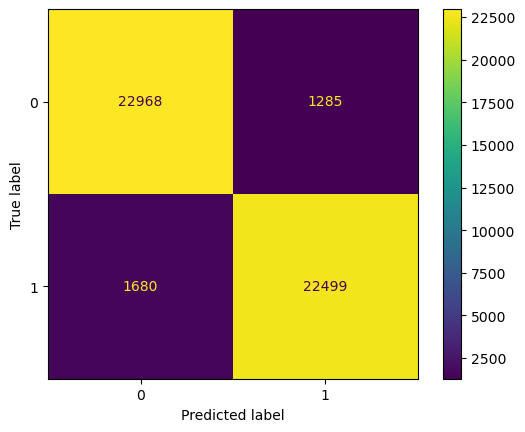

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_tuned_test_predictions_tfidf)).plot()

In this, we can see that the number of incorrectly labeled samples by the model decreased. It managed to correctly identify 126 more negative samples and 93 more positive samples.

### Evaluation
Now, let us evaluate the performance of the model on the test set by computing its scores on the metrics. 

In [56]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, lr_tuned_test_predictions_tfidf)    

temp_scores = {
    'Model' : 'Logistic Regression',
    'Vectorizer' : 'TF-IDF Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score, 
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  93.87801453584407 %
F1 Macro Average:  93.87744040100698 %
F1 Micro Average:  93.87801453584407 %
Hamming Loss:  6.12198546415593 %
Precision:  93.87801453584407 %
Recall:  93.87801453584407 %


From these scores, we can see that the accuracy score of the [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) trained on [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) has increased by 0.45%.

### Feature Importance

To determine which words our model uses more in predicting, let us determine the importance of each of the feature (word).

In [ ]:
eli5.show_weights(estimator=lr_tuned_model_tfidf, 
                  feature_names= list(tfidf_vectorizer.get_feature_names()),
                  top=(50, 5))

## Logistic Regression (Count Vectorizer)
Now, let us move on with the training and tuning of a  [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model on a document-term matrix generated by a [`Count Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

### Model Training 
To start with the model training, we will need to define an instance of a [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model like we have done previously.

In [57]:
log_reg = LogisticRegression(n_jobs = -1)

Then, we can continue with the model training. 

In [58]:
log_reg_count, lr_test_predictions_count = train_model (log_reg, 
                                                        count_train, y_train, 
                                                        count_test, y_test, 
                                                        'logreg', 'count')

Accuracy:  93.36812824409968 %
F1 Macro Average:  93.36395952062337 %
F1 Micro Average:  93.36812824409968 %
Hamming Loss:  6.631871755900318 %
Precision:  93.36812824409968 %
Recall:  93.36812824409968 %


Like we have previously done, a [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) will be created to visualize the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test data.

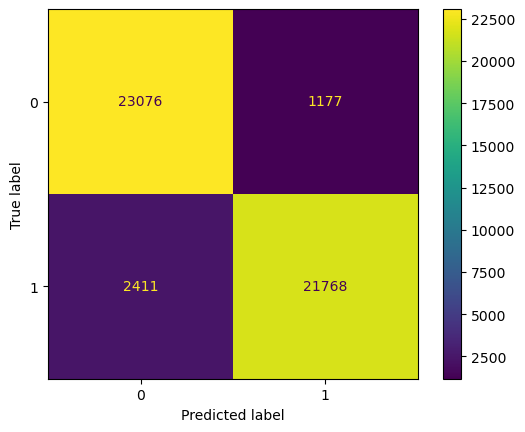

In [59]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_test_predictions_count)).plot()

From this display, we can see that the model was incorrect in identifying 4.85% of the negative labels, and 9.97% of the positive label. To see the effect of these incorrectly taggeed samples in the metrics, let us compute the score of the model.

In [60]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, lr_test_predictions_count)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  92.59167492566898 %
F1 Macro Average:  92.58626753695228 %
F1 Micro Average:  92.59167492566898 %
Hamming Loss:  7.408325074331021 %
Precision:  92.59167492566898 %
Recall:  92.59167492566898 %


In these scores, we can see that the model received 92.59% score in accuracy, which is still considered high (as it was able to reach 90%). However, the first  [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model still received higher scores. 

### Hyperparameter Tuning
Now, we can continue to tuning the model. To begin with, an instance of [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) will be generated.

In [61]:
log_reg = LogisticRegression(n_jobs = -1)

As we have already defined an instance of the model that we will be using as the base model, we can move on to tuning this model.

In [62]:
lr_tuned_model_count, lr_tuned_test_predictions_count = tune_and_train_model (log_reg, lr_hp_space, 
                                                                              count_train, y_train, 
                                                                              count_test, y_test,
                                                                              'logreg_tuned', 'count')

Tuning LogisticRegression(n_jobs=-1)...


As a result of tuning process, the identified best values of the hyperparameters for this model was an **inverse of regularization strength of 1, and a maximum iteration value of 1100**.

In [63]:
lr_tuned_model_count

LogisticRegression(C=1, max_iter=1100, n_jobs=-1)

To determine if there are more false positives or more false negatives in the predictions, we will be utilizing the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to create a visualization for the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test set. 

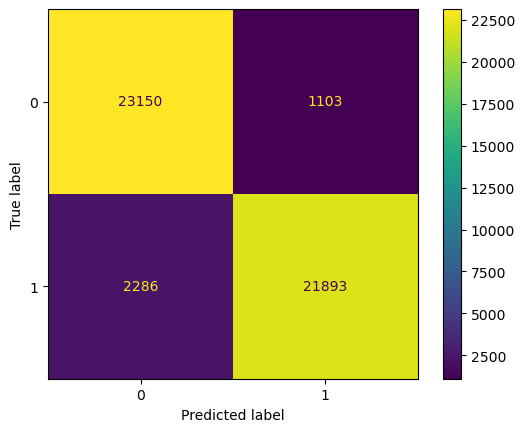

In [64]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_tuned_test_predictions_count)).plot()

In this resulting visualization, we can see that there are more incorrectly tagged as negative compared to the number of samples that are tagged as positive even though they are actually negative samples.

### Evaluation

Now, let us evaluate the performance of the model on the test set by computing the scores using the metrics. 

In [65]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, lr_tuned_test_predictions_count)    

temp_scores = {
    'Model' : 'Logistic Regression',
    'Vectorizer' : 'Count Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  93.00256029071689 %
F1 Macro Average:  92.99784359831027 %
F1 Micro Average:  93.00256029071689 %
Hamming Loss:  6.997439709283118 %
Precision:  93.00256029071689 %
Recall:  93.00256029071689 %


Comparing the tuned model with the base [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model, we can see that the tuning process helped improve the model's accuracy by 0.41%.

### Feature Importance
Like in the previous model, we can move on with determining which words have more weights in labeling the samples as positive or negative. 

In [ ]:
eli5.show_weights(estimator=lr_tuned_model_count, 
                  feature_names= list(count_vectorizer.get_feature_names()),
                  top=(50,5))

## Multinomial Naive Bayes (TF-IDF Vectorizer)
The third model that we will be training is a [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model that utilized a document-term matrix generated by a [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

### Model Training 
As our first step, we will first need to define a [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) object.

In [66]:
multinomial_nb = MultinomialNB ()

We pass the [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) object that we have instantiated to the function we have created to train.

In [67]:
mnb_tfidf, mnb_test_predictions_tfidf = train_model (multinomial_nb, 
                                                     tfidf_train, y_train, 
                                                     tfidf_test, y_test, 
                                                     'mnb', 'tfidf')

Accuracy:  89.18700352728628 %
F1 Macro Average:  89.10844125480095 %
F1 Micro Average:  89.18700352728628 %
Hamming Loss:  10.812996472713717 %
Precision:  89.18700352728628 %
Recall:  89.18700352728628 %


Using the predictions that the training function created, let us generate a [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and display it using [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

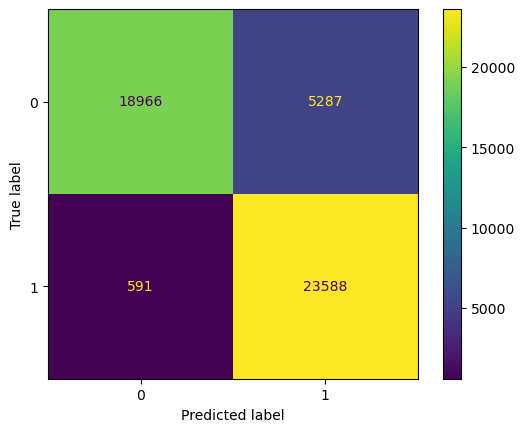

In [68]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mnb_test_predictions_tfidf)).plot()

We will also be using the test predictions to put a number on the performance of the model by computing its scores on the metrics.

In [69]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, mnb_test_predictions_tfidf)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  87.86339610175091 %
F1 Macro Average:  87.75184710358761 %
F1 Micro Average:  87.86339610175091 %
Hamming Loss:  12.136603898249092 %
Precision:  87.86339610175091 %
Recall:  87.86339610175091 %


Using these results, we can see that it managed to score 87.86% as its accuracy. This is lower than the accuracy scores that previous models received. 

### Hyperparameter Tuning
Like in the previous models, to start the tuning of the model, we will also need to create an instance of the [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model.

In [70]:
multinomial_nb = MultinomialNB ()

Afterwards, we will also pass this instance to the training and tuning function that we have previously created.

In [71]:
mnb_tuned_model_tfidf, mnb_tuned_test_predictions_tfidf = tune_and_train_model (multinomial_nb, mnb_hp_space, 
                                                                                tfidf_train, y_train, 
                                                                                tfidf_test, y_test,
                                                                                'mnb_tuned', 'tfidf')

Tuning MultinomialNB()...


From the tuning, we received a tuned model with the hyperparameter values: (1) **0.1 as its alpha**, and (2) **True as its fit_prior** (the default value for this hyperparmeter).

In [72]:
mnb_tuned_model_tfidf

MultinomialNB(alpha=0.1)

Using the predictions of the tuned model, we will be using the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to show the  [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

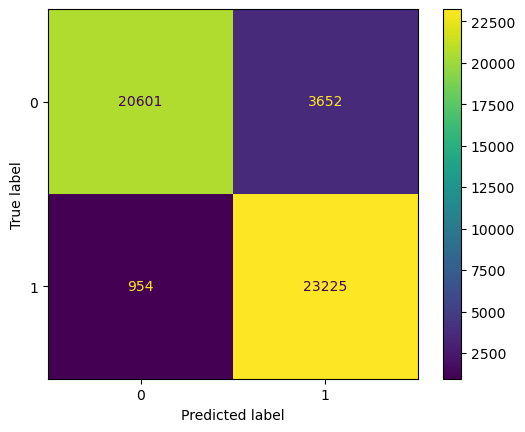

In [73]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mnb_tuned_test_predictions_tfidf)).plot()

Surprisingly, we can see that the model was able to predict more negative instances than the previous models (i.e., it predicted less number of false negatives). However, it recorded the highest number of false positives, as seen in the upper-right cell.

### Evaluation
We can now move on to evaluating the performance of the model on the metrics. 

In [74]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, mnb_tuned_test_predictions_tfidf)    

temp_scores = {
    'Model' : 'Multinomial Naive Bayes',
    'Vectorizer' : 'TF-IDF Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  90.48975883713247 %
F1 Macro Average:  90.46176057508933 %
F1 Micro Average:  90.48975883713247 %
Hamming Loss:  9.510241162867526 %
Precision:  90.48975883713247 %
Recall:  90.48975883713247 %


From the results of predicting on the test set using the tuned model, it can be seen that the performance on the accuracy metric of the [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model improved by 2.62%.

### Feature Importance
Now, let us also see which words were important for the model in classifying the instances. 

## Multinomial Naive Bayes (Count Vectorizer)
Next, we will be using the document-term matrix produced by a [`Count Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to train a [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model.

### Model Training 
As done previously, we will start by creating an instance of [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) class.

In [75]:
multinomial_nb = MultinomialNB ()

With this, we can proceed with training the model.

In [76]:
mnb_count, mnb_test_predictions_count = train_model (multinomial_nb, 
                                                     count_train, y_train, 
                                                     count_test, y_test, 
                                                     'mnb', 'count')

Accuracy:  90.44879699463738 %
F1 Macro Average:  90.41821611172453 %
F1 Micro Average:  90.44879699463738 %
Hamming Loss:  9.551203005362623 %
Precision:  90.44879699463738 %
Recall:  90.44879699463738 %


To determine if there are more false positives or false negatives in our predictions, we will be generating the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the predictions, and then using [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) for visualization.

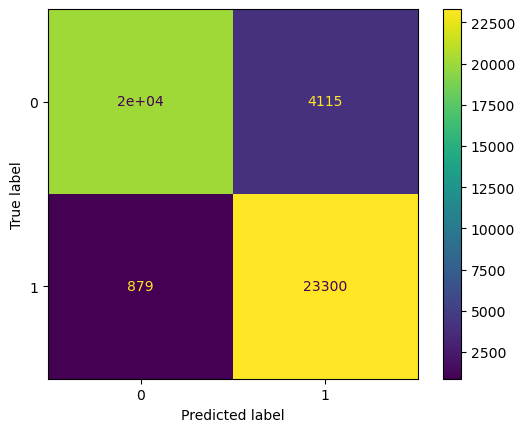

In [77]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mnb_test_predictions_count)).plot()

Then, we can proceed with computing the score of the predictions.

In [78]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, mnb_test_predictions_count)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  89.68863561281796 %
F1 Macro Average:  89.64449583205243 %
F1 Micro Average:  89.68863561281796 %
Hamming Loss:  10.311364387182028 %
Precision:  89.68863561281796 %
Recall:  89.68863561281796 %


The [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model using the document-term matrix produced by  [`Count Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) received 89.68% as its accuracy. This is actually higher than the accuracy of the untuned [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model using the [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

### Hyperparameter Tuning
As the training is done, we can continue with the tuning of the model. As done previously, we will first generate an instance of the [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) object. 

In [79]:
multinomial_nb = MultinomialNB ()

With this object, we can now tune the model.

In [80]:
mnb_tuned_model_count, mnb_tuned_test_predictions_count = tune_and_train_model (multinomial_nb, mnb_hp_space, 
                                                                                count_train, y_train, 
                                                                                count_test, y_test,
                                                                                'mnb_tuned', 'count')

Tuning MultinomialNB()...


After the tuning, we can see that the hyperparameter value that received the highest score for the model was the **alpha value of 0.1 and the fit_prior value of True**.

In [81]:
mnb_tuned_model_count

MultinomialNB(alpha=0.1)

Now, let us visualize the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test data through the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

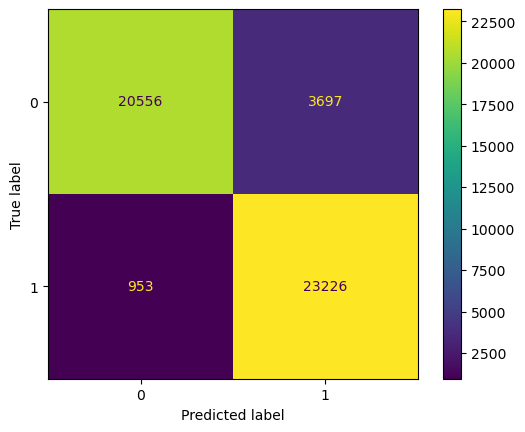

In [82]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mnb_tuned_test_predictions_count)).plot()

From this, we can see that the model incorrectly 15.24% of the negative samples, and 9.53% of the positive samples. Now, let us compute the scores of the model on the test set using the metrics. 

### Evaluation
Now, let us evaluate the performance of the model on the test set by computing its scores on the metrics. 

In [83]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, mnb_tuned_test_predictions_count)    

temp_scores = {
    'Model' : 'Multinomial Naive Bayes',
    'Vectorizer' : 'Count Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  90.39890981169475 %
F1 Macro Average:  90.36964133110159 %
F1 Micro Average:  90.39890981169475 %
Hamming Loss:  9.601090188305253 %
Precision:  90.39890981169475 %
Recall:  90.39890981169475 %


From the results of predicting on the test set using the tuned model, it can be seen that the performance on the accuracy metric of the [`Multinomial Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model improved by 0.71%. Although, after tuning, the [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) now has higher accuracy.

### Feature Importance

To determine which words our model uses more in predicting, let us determine the importance of each of the feature (word).

## Random Forest Classifier (TF-IDF Vectorizer)
Now, let us move on with the training and tuning of a [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model on a document-term matrix generated by a [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

### Model Training
To start with the model training, we will need to define an instance of a [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model like we have done previously. Note that the **n_jobs = -1** just means that all processors can be used for its training.

In [84]:
rf_classifier = RandomForestClassifier(n_jobs = -1)

Using this instance, we will now be training the model using the function we previously created.

In [85]:
rf_tfidf, rf_test_predictions_tfidf = train_model (rf_classifier,
                                                   tfidf_train, y_train, 
                                                   tfidf_test, y_test, 
                                                   'rf', 'tfidf')

Accuracy:  99.99139686272261 %
F1 Macro Average:  99.9913968408511 %
F1 Micro Average:  99.99139686272261 %
Hamming Loss:  0.008603137277393823 %
Precision:  99.99139686272261 %
Recall:  99.99139686272261 %


To fully understand how our model fares with the test data, we will be plotting the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test data using the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) function.

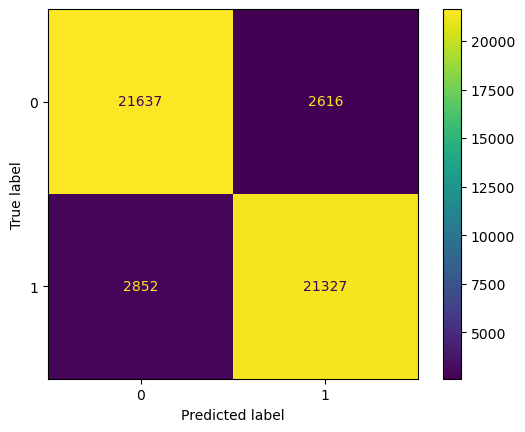

In [86]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_test_predictions_tfidf)).plot()

From this, we can see that the model incorrectly 10.78% of the negative samples, and 11.79% of the positive samples. Now, let us compute the scores of the model on the test set using the metrics. 

In [87]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, rf_test_predictions_tfidf)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  88.70994383878428 %
F1 Macro Average:  88.70948127409628 %
F1 Micro Average:  88.70994383878428 %
Hamming Loss:  11.290056161215725 %
Precision:  88.70994383878428 %
Recall:  88.70994383878428 %


From the scores, we can see that it managed to get 88.70% on the accuracy, which is lower than the score it received from the train data.

### Hyperparameter Tuning
Now, we can continue to tuning the model. To begin with, an instance of [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) will be generated.

In [88]:
rf_classifier = RandomForestClassifier(n_jobs = -1)

As we have already defined an instance of the model that we will be using as the base model, we can move on to tuning this model.

In [89]:
rf_tuned_model_tfidf, rf_tuned_test_predictions_tfidf = tune_and_train_model (rf_classifier, rf_hp_space, 
                                                                              tfidf_train, y_train,
                                                                              tfidf_test, y_test,
                                                                              'rf_tuned', 'tfidf')

Tuning RandomForestClassifier(n_jobs=-1)...


As a result of tuning process, the identified best values of the hyperparameters for this model was **150 for the number of trees in the forest**, with **no maximum number of value for its leaf nodes and depth**. 

In [90]:
rf_tuned_model_tfidf

RandomForestClassifier(n_estimators=150, n_jobs=-1)

To determine if there are more false positives or more false negatives in the predictions, we will be utilizing the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to create a visualization for the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test set. 

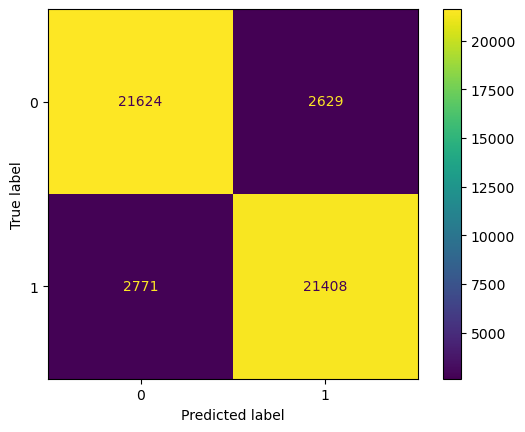

In [91]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_tuned_test_predictions_tfidf)).plot()

In this resulting visualization, we can see that the number of false positive and the number of false negatives are actually near in value. 

### Evaluation
Now, let us evaluate the performance of the model on the test set by computing the scores using the metrics. 

In [92]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, rf_tuned_test_predictions_tfidf)    

temp_scores = {
    'Model' : 'Random Forest Classifier',
    'Vectorizer' : 'TF-IDF Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  88.85034687809713 %
F1 Macro Average:  88.85012510304517 %
F1 Micro Average:  88.85034687809713 %
Hamming Loss:  11.149653121902874 %
Precision:  88.85034687809713 %
Recall:  88.85034687809713 %


Comparing the tuned model with the base [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model, we can see that the tuning process helped improve the model's accuracy by 0.15%.

### Feature Importance
Like in the previous model, we can move on with determining which words have more weights in labeling the samples as positive or negative. 

## Random Forest Classifier (Count Vectorizer)
The last model that we will be training is a [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model that was trained on a document-term matrix generated by a [`Count Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

### Model Training 
As done previously, we will start by creating an instance of [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class.

In [93]:
rf_classifier = RandomForestClassifier(n_jobs = -1)

With this, we can proceed with training the model.

In [94]:
rf_count, rf_test_predictions_count = train_model (rf_classifier,
                                                   count_train, y_train, 
                                                   count_test, y_test, 
                                                   'rf', 'count')

Accuracy:  99.99197040520777 %
F1 Macro Average:  99.99197038580944 %
F1 Micro Average:  99.99197040520777 %
Hamming Loss:  0.008029594792234234 %
Precision:  99.99197040520777 %
Recall:  99.99197040520777 %


To fully understand how our model fares with the test data, we will be plotting the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test data using the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) function.

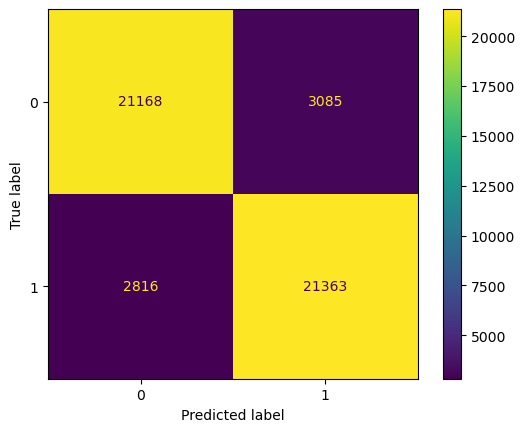

In [95]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_test_predictions_count)).plot()

From this, we can see that the model incorrectly 12.72% of the negative samples, and 11.64% of the positive samples. Now, let us compute the scores of the model on the test set using the metrics. 

In [96]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, rf_test_predictions_count)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  87.81590683845391 %
F1 Macro Average:  87.81570932136924 %
F1 Micro Average:  87.81590683845391 %
Hamming Loss:  12.184093161546086 %
Precision:  87.81590683845391 %
Recall:  87.81590683845391 %


In this, we can see that the untuned [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model received 87.81% as its accuracy score.

### Hyperparameter Tuning
We can now start tuning the [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model by creating an instance of the model. 

In [97]:
rf_classifier = RandomForestClassifier(n_jobs = -1)

With this instance, we can now tune the model.

In [98]:
rf_tuned_model_count, rf_tuned_test_predictions_count = tune_and_train_model (rf_classifier, rf_hp_space, 
                                                                              count_train, y_train,
                                                                              count_test, y_test,
                                                                              'rf_tuned', 'count')

Tuning RandomForestClassifier(n_jobs=-1)...


From the tuning, we can see that the hyperparameter values received by the model trained on a [`Count Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) document-term matrix is the same as the model trained on a [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) document-term matrix. 

In [99]:
rf_tuned_model_count

RandomForestClassifier(n_estimators=150, n_jobs=-1)

Now, let us visualize the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the test data through the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

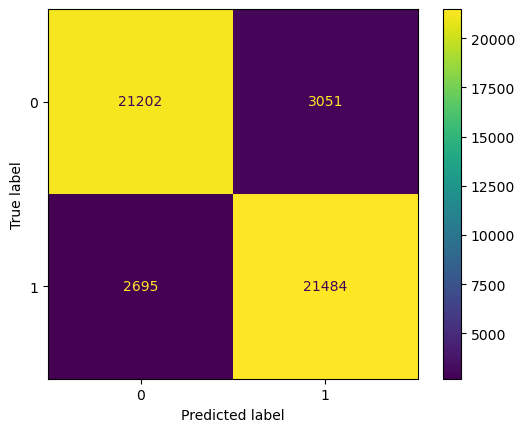

In [100]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_tuned_test_predictions_count)).plot()

In this, we can see that the number of incorrectly labeled samples by the model decreased. It managed to correctly identify 34 more negative samples and 121 more positive samples.

### Evaluation
Now, let us evaluate the performance of the model on the test set by computing its scores on the metrics. 

In [101]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, rf_tuned_test_predictions_count)    

temp_scores = {
    'Model' : 'Random Forest Classifier',
    'Vectorizer' : 'Count Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  88.1359431780641 %
F1 Macro Average:  88.13554094168046 %
F1 Micro Average:  88.1359431780641 %
Hamming Loss:  11.864056821935911 %
Precision:  88.1359431780641 %
Recall:  88.1359431780641 %


From these scores, we can see that the accuracy score of the [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model that was trained on a document-term matrix generated by a [`Count Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) has increased by 0.32%.

### Feature Importance
To determine which words our model uses more in predicting, let us determine the importance of each of the feature (word).

# **Model Scores Summary**

As a summary, we can see the the model that received the best  score for all of the metrics is the tuned [`Logistic Regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model, which utilized [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) as its feature engineering. Meanwhile, the model with the worst scores is the [`Random Forest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with [`Count Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) as its feature engineering. 


Also, it is important to note that for all of the models, the [`TF-IDF Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) performed better than the [`Count Vectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [102]:
pd.DataFrame(scores_list).sort_values(['Accuracy', 'F1 Micro Average', 'F1 Macro Average', 'Hamming Loss', 'Precision', 'Recall'], ascending = False).reset_index(drop = True)

,Model,Vectorizer,Accuracy,F1 Micro Average,F1 Macro Average,Hamming Loss,Precision,Recall
0,Logistic Regression,TF-IDF Vectorizer,93.878015,93.878015,93.877440,6.121985,93.878015,93.878015
1,Logistic Regression,Count Vectorizer,93.002560,93.002560,92.997844,6.997440,93.002560,93.002560
2,Multinomial Naive Bayes,TF-IDF Vectorizer,90.489759,90.489759,90.461761,9.510241,90.489759,90.489759
3,Multinomial Naive Bayes,Count Vectorizer,90.398910,90.398910,90.369641,9.601090,90.398910,90.398910
4,Random Forest Classifier,TF-IDF Vectorizer,88.850347,88.850347,88.850125,11.149653,88.850347,88.850347
5,Random Forest Classifier,Count Vectorizer,88.135943,88.135943,88.135541,11.864057,88.135943,88.135943
